# Titanic Data Analysis


In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Practice Skills:
 - Binary classification ===> Logistic Regression, LDA...
 - Python and R basics

Goal:
 - It is your job to predict if a passenger survived the sinking of the Titanic or not. 
 - For each PassengerId in the test set, you must predict a 0 or 1 value for the Survived variable.

Metric:
 - Your score is the percentage of passengers you correctly predict. This is known simply as "accuracy”.

## Data Analysis 

In [1]:
#Importing Data Analysis Libs
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Getting .csv files 
df = pd.read_csv('../input/train.csv')
dfTest = pd.read_csv('../input/test.csv')

### Checking Dataframe ...

In [3]:
#Checking the first lines
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Data Types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
#Checking the shape of the dataframe
df.shape

(891, 12)

In [6]:
dfTest.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [7]:
dfTest.shape

(418, 11)

In [8]:
#Statistic Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
dfTest.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,NaN,0.000000,0.000000,NaN
50%,1100.500000,3.000000,NaN,0.000000,0.000000,NaN
75%,1204.750000,3.000000,NaN,1.000000,0.000000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


 Column Age doesn't have all values 

In [10]:
#Cheking columns with null values in Dataframe
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [11]:
# Pclass column distribution
df.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

### Dataframe Transformations...

In [12]:
#Copying Dataframe 
dfT = df

In [13]:
#Checking Unique values from Sex Column
sex_values = df.drop_duplicates('Sex')
print(sex_values['Sex'])

0      male
1    female
Name: Sex, dtype: object


In [14]:
#Label Encoding for Sex Column
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(dfT['Sex'])
#list(le.classes_)
dfT['Sex'] = le.transform(dfT['Sex'])


le.fit(dfTest['Sex'])
#list(le.classes_)
dfTest['Sex'] = le.transform(dfTest['Sex'])

In [15]:
#Checking Unique values from Embarked Column
embarked_values = df.drop_duplicates('Embarked')
print(embarked_values['Embarked'])

0       S
1       C
5       Q
61    NaN
Name: Embarked, dtype: object


In [16]:
#Using mode to fulfill null values on Embarked Column
dfT['Embarked'].fillna(dfT['Embarked'].mode()[0], inplace=True)
dfTest['Embarked'].fillna(dfTest['Embarked'].mode()[0], inplace=True)

In [17]:
#Label Encoding for Embarked Column
le.fit(dfT['Embarked'])
#list(le.classes_)
dfT['Embarked'] = le.transform(dfT['Embarked'])

le.fit(dfTest['Embarked'])
#list(le.classes_)
dfTest['Embarked'] = le.transform(dfTest['Embarked'])

In [18]:
#Using Mean to fulfill null values on Column Age
dfT['Age'].fillna(dfT['Age'].mean(), inplace=True)
dfTest['Age'].fillna(dfTest['Age'].mean(), inplace=True)

In [19]:
#Dataset Formatting
dfT.shape

(891, 12)

In [20]:
dfT.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked         int64
dtype: object

In [21]:
#Statistic Summary
dfT.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.536476
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.791503
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [22]:
#Checking nulls on Dataframe
dfT.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

In [23]:
dfTest.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [24]:
#Completing column Fare with 0 instead of Null
dfTest['Fare'] = dfTest['Fare'].fillna(0)

All columns with the same qtd of data

### Data Visualization...

In [25]:
#Visualization libs
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

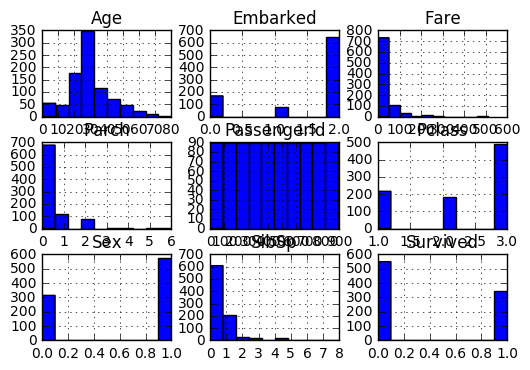

In [26]:
# Histogram
dfT.hist()
plt.show()

In [27]:
# Correlation Matrix with names
columns = ['pID', 'surviv', 'pclass', 'sex','age', 'sibsp', 'parch', 'fare', 'Emb']
correlations = dfT.corr()
print (correlations)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   
Embarked        0.013128 -0.167675  0.162098  0.108262 -0.026749  0.068230   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658  0.013128  
Survived     0.081629  0.257307 -0.167675  
Pclass       0.018443 -0.549500  0.162098  
Sex         -0.245489 -0.182333  0.108262  

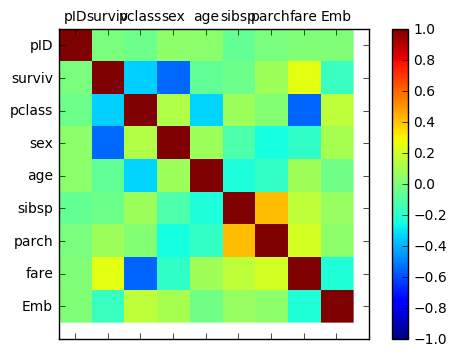

In [28]:
# Plot
#import numpy as np
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle(['red', 'black', 'yellow'])
cax = ax.matshow(correlations, interpolation='nearest', vmin = -1, vmax = 1)
#cax = ax.imshow(correlations, interpolation='nearest', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(columns)
ax.set_yticklabels(columns)
plt.show()

Sibsp and Parch have high correlation
 - Sibsp =	# of siblings / spouses
 - Parch = # of parents / children

Create one new column adding Sibsp and Parch

In [29]:
#Adding columns SibSp and Parch => FamilySize
dfT['FamilySize'] = dfT['SibSp'] + dfT['Parch']
dfTest['FamilySize'] = dfTest['SibSp'] + dfTest['Parch']

In [30]:
new_columns = ['pID', 'surviv', 'pclass', 'sex','age', 'Fam', 'fare', 'Emb']

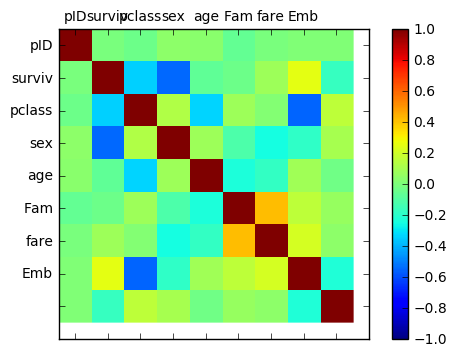

In [31]:
# New Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_color_cycle(['red', 'black', 'yellow'])
cax = ax.matshow(correlations, interpolation='nearest', vmin = -1, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0, 10, 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(new_columns)
ax.set_yticklabels(new_columns)
plt.show()

Qtd of family members have influence on fare.
Local have influence on fare.

Local seems to have influence on survival.
Fare seems to have influence on survival.
      

In [32]:
#Visualizing data with seaborn
import seaborn as sns

In [33]:
#Dropping name columns (Name, Cabin and Ticket) from Dataframe
dfT = dfT.drop(['Name','Cabin','Ticket'],axis=1)
dfTest = dfTest.drop(['Name','Cabin','Ticket'],axis=1)

In [34]:
dfT.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
FamilySize       int64
dtype: object

In [35]:
dfTest.dtypes

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
FamilySize       int64
dtype: object

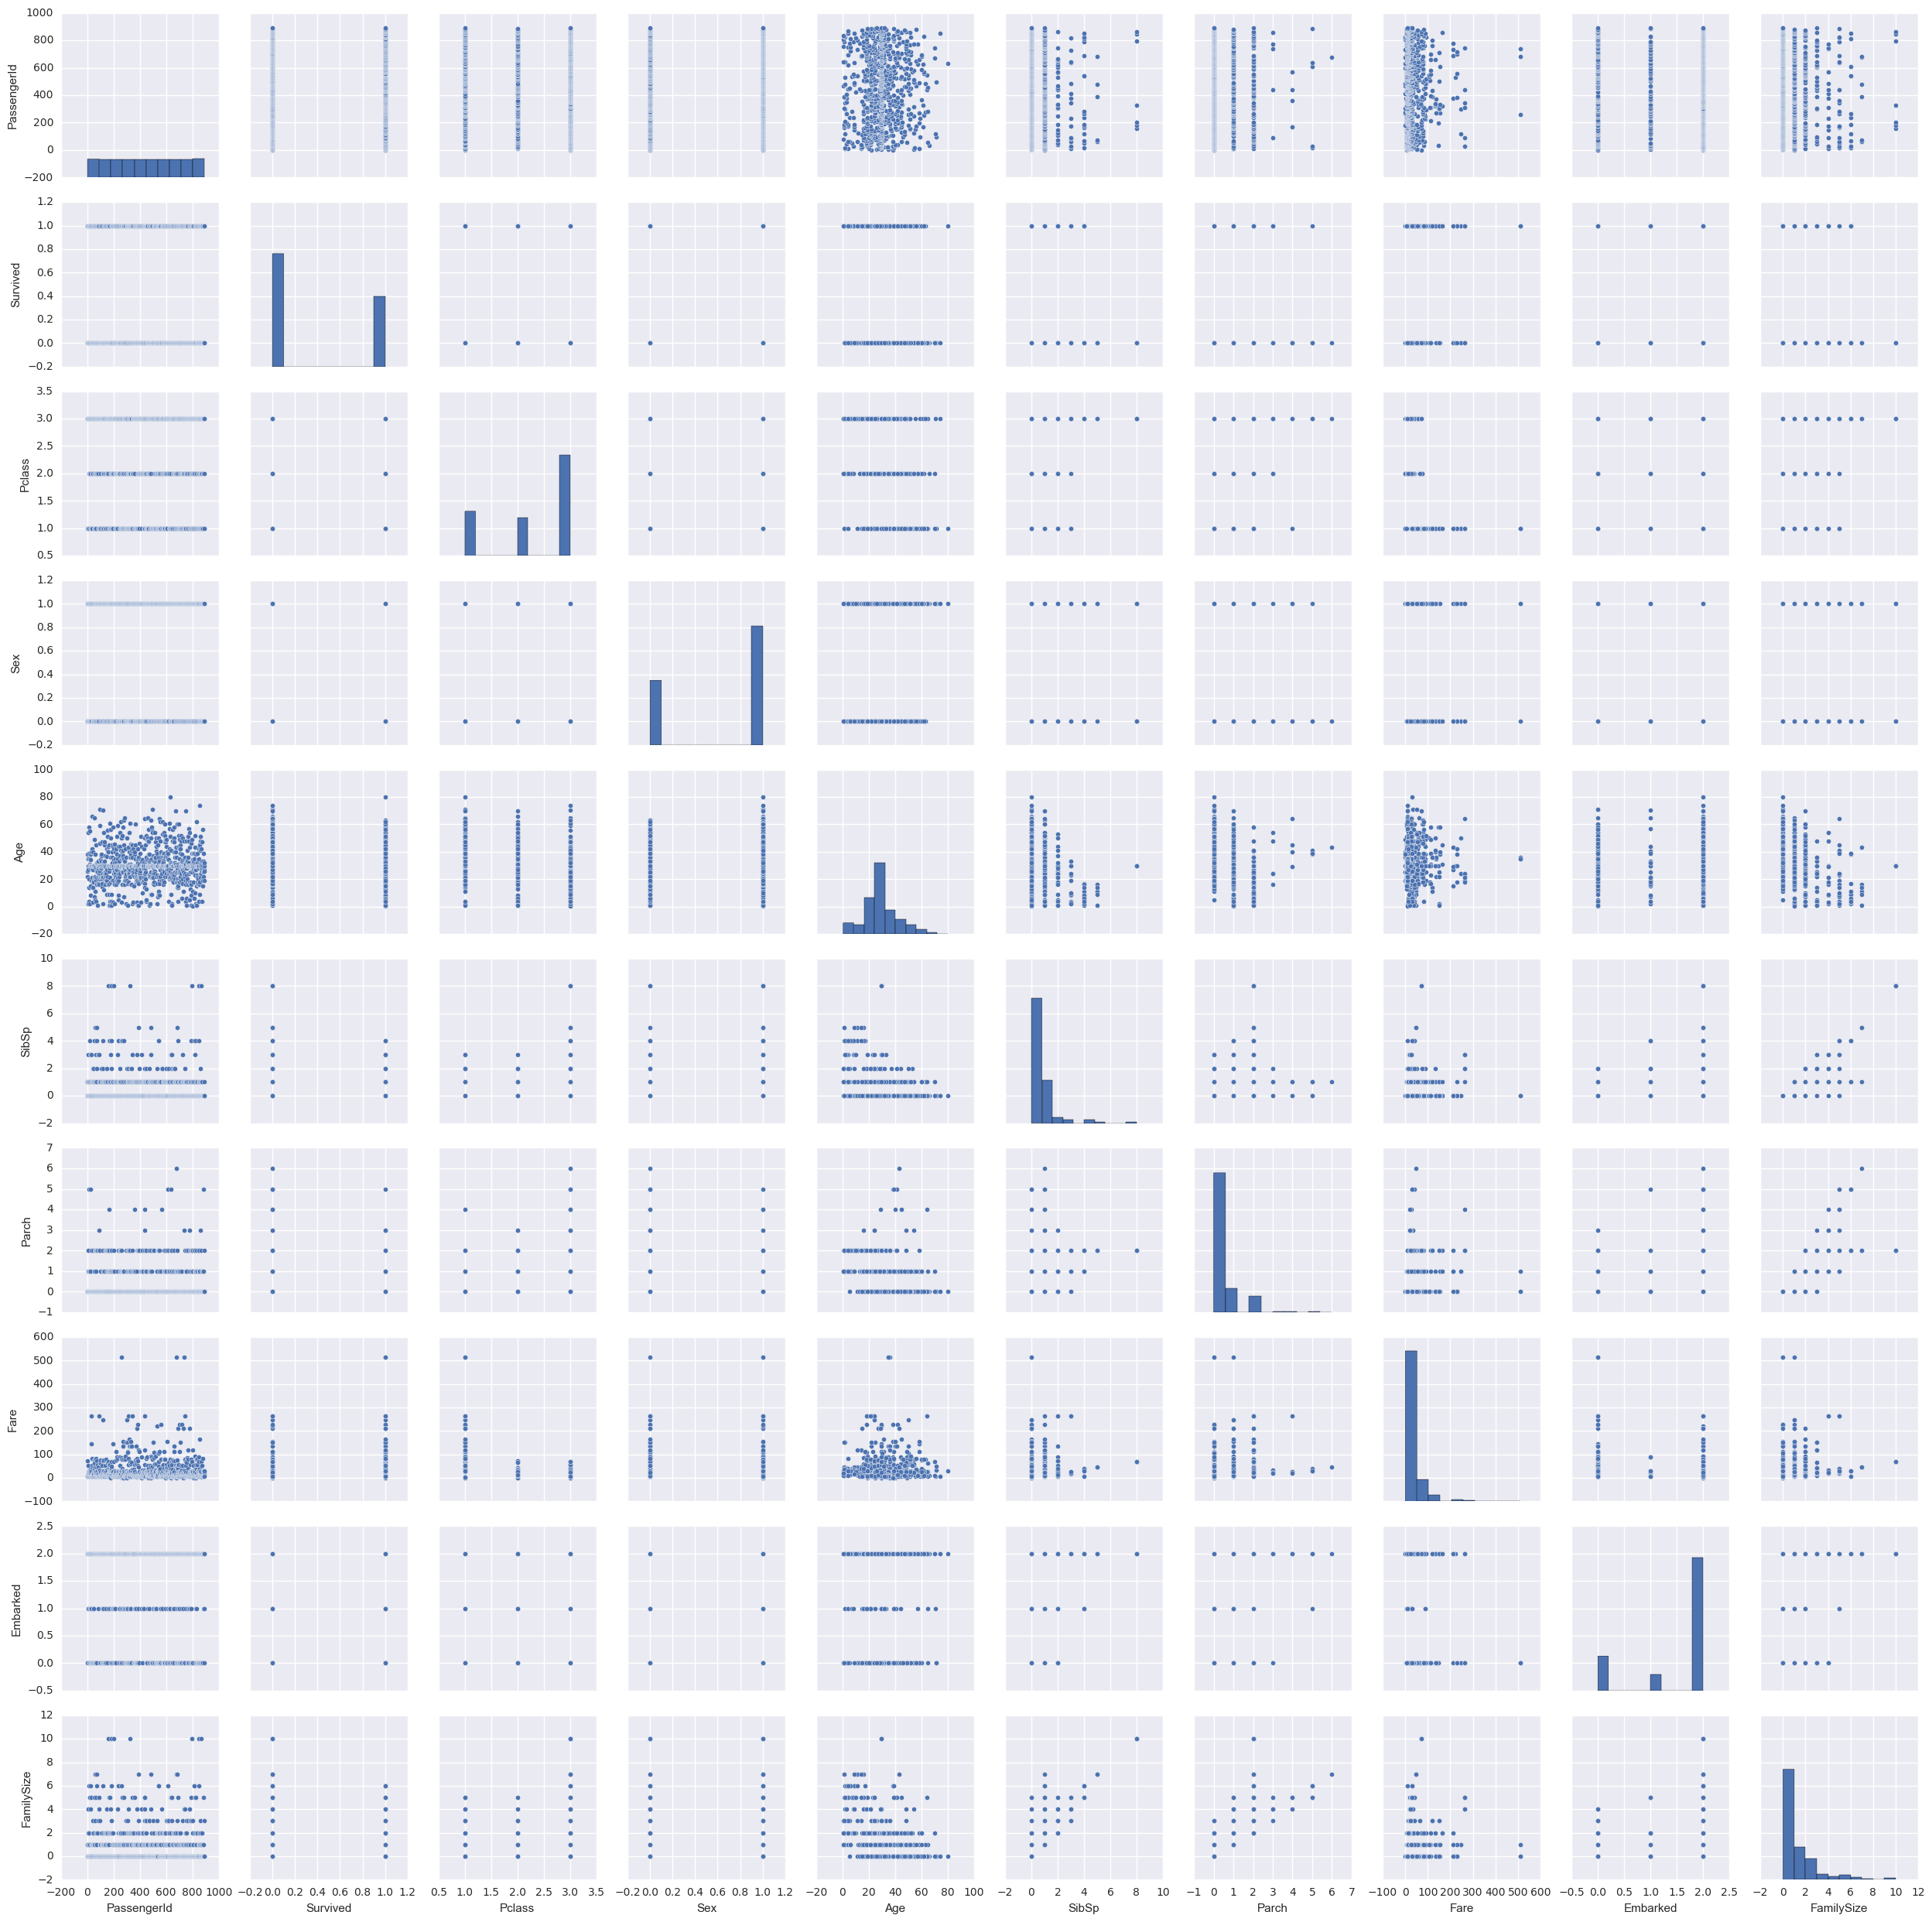

In [36]:
# Pairplot   ====> Must have all columns without nulls
sns.pairplot(dfT)  

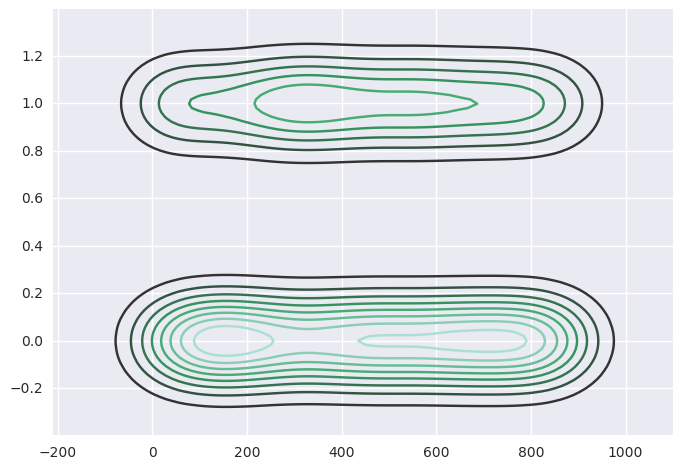

In [37]:
# kdeplot
sns.kdeplot(dfT)

In [38]:
dfT.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,0,38.0,1,0,71.2833,0,1
2,3,1,3,0,26.0,0,0,7.9250,2,0


## Preparing data for Machine Learning

In [49]:
# Transformando os dados para a mesma escala (entre 0 e 1)

# Import dos módulos
#from pandas import read_csv
from sklearn.preprocessing import MinMaxScaler

colTrain = ['PassengerId', 'Pclass', 'Sex','Age', 'Fare', 'Embarked','FamilySize', 'Survived']
dfMLTrain = dfT[colTrain]
arrayTrain = dfMLTrain.values

colTest = ['PassengerId', 'Pclass', 'Sex','Age', 'Fare', 'Embarked','FamilySize']
dfMLTest = dfTest[colTest]
arrayTest = dfMLTest.values

# Splitting array in input and output
XTrain = arrayTrain[:,0:7]
YTrain = arrayTrain[:,7]
XTest = arrayTest[:,0:7]

# Creating new scale
scaler = MinMaxScaler(feature_range = (0, 1))
rescaledXTrain = scaler.fit_transform(XTrain)
rescaledXTest = scaler.fit_transform(XTest)


# Data transformed
print(rescaledXTrain[0:5,:])

[[ 0.          1.          1.          0.27117366  0.01415106  1.          0.1       ]
 [ 0.0011236   0.          0.          0.4722292   0.13913574  0.          0.1       ]
 [ 0.00224719  1.          0.          0.32143755  0.01546857  1.          0.        ]
 [ 0.00337079  0.          0.          0.43453129  0.1036443   1.          0.1       ]
 [ 0.00449438  1.          1.          0.43453129  0.01571255  1.          0.        ]]


### Feature Selection

In [50]:
# Feature Selection using chi2 test

# Import modules
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Selecting the 5 better features that can be used in prediction model
test = SelectKBest(score_func = chi2, k = 5) 
fit = test.fit(XTrain, YTrain)

# Summarizing score
print(fit.scores_)
features = fit.transform(XTrain)

# Summarizing selected Features
print(features[0:5,:])

[  3.31293407e+00   3.08736994e+01   9.27024470e+01   2.46879258e+01
   4.51831909e+03   1.02025247e+01   7.09091328e-01]
[[  3.       1.      22.       7.25     2.    ]
 [  1.       0.      38.      71.2833   0.    ]
 [  3.       0.      26.       7.925    2.    ]
 [  1.       0.      35.      53.1      2.    ]
 [  3.       1.      35.       8.05     2.    ]]


[  3.31293407e+00   3.08736994e+01   9.27024470e+01   2.46879258e+01  4.51831909e+03   1.02025247e+01   7.09091328e-01]

['PassengerId',     'Pclass',        'Sex',           'Age',          'Fare',          'Embarked',      'FamilySize']

Better variables: Sex, FamilySize, Fare, PassengerId, Pclass, Age e Embarked 

### Selecting Prediction Model

LR: 0.801348 (0.028429)
LDA: 0.800225 (0.029633)
NB: 0.789064 (0.026324)
KNN: 0.601610 (0.088589)
CART: 0.768876 (0.073563)
SVM: 0.616217 (0.070492)


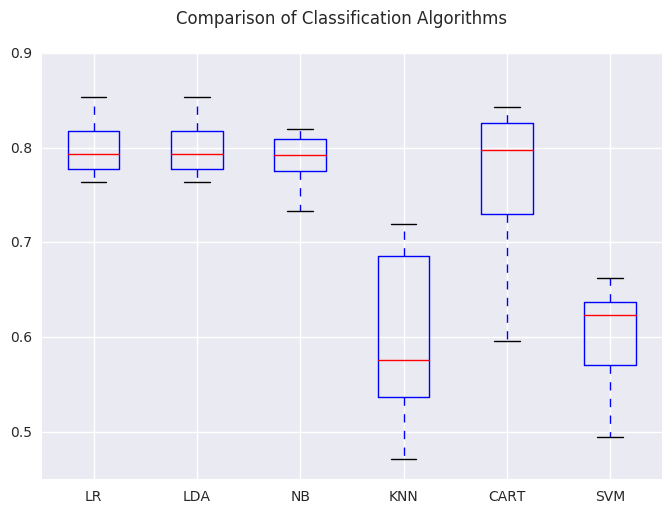

In [63]:
# Import modules
from sklearn import cross_validation
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


# Defining number of folds
num_folds = 10
num_instances = len(XTrain)
seed = 7

# Preparing models
modelos = []
modelos.append(('LR', LogisticRegression()))
modelos.append(('LDA', LinearDiscriminantAnalysis()))
modelos.append(('NB', GaussianNB()))
modelos.append(('KNN', KNeighborsClassifier()))
modelos.append(('CART', DecisionTreeClassifier()))
modelos.append(('SVM', SVC()))

# Model Evaluation
resultados = []
nomes = []

for nome, modelo in modelos:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_validation.cross_val_score(modelo, XTrain, YTrain, cv = kfold, scoring = 'accuracy')
    resultados.append(cv_results)
    nomes.append(nome)
    msg = "%s: %f (%f)" % (nome, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot to compare algorithms
fig = plt.figure()
fig.suptitle('Comparison of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(resultados)
ax.set_xticklabels(nomes)
plt.show()

Logistic Regression is the better algorithm in this case.

## Using Logistic Regression

In [58]:
# Creating logistic regression model 
modelLR = LogisticRegression()

# Training model and checking the score
modelLR.fit(XTrain, YTrain)
modelLR.score(XTrain, YTrain)

# Colecting coefficients
print('Coefficient: \n', modelLR.coef_)
print('Intercept: \n', modelLR.intercept_)

# Predictions
YPred = modelLR.predict(XTest)

Coefficient: 
 [[  3.06332676e-04  -8.12664381e-01  -2.51986259e+00  -2.79539147e-02
    4.77407681e-03  -1.48296693e-01  -2.03439333e-01]]
Intercept: 
 [ 3.82977332]


In [59]:
#Testing accuracy
acc_log = round(modelLR.score(XTrain, YTrain) * 100, 2)
acc_log

80.25

In [62]:
#Creating Submission file
submission = pd.DataFrame({
        "PassengerId": dfTest["PassengerId"],
        "Survived": YPred
    })

submission.to_csv('../output/submission.csv', index=False)